In [1]:
#!git clone https://github.com/calebchiam/cs6742-fork

Cloning into 'cs6742-fork'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 3653 (delta 101), reused 116 (delta 57), pack-reused 3481
Receiving objects: 100% (3653/3653), 39.07 MiB | 1.03 MiB/s, done.
Resolving deltas: 100% (2369/2369), done.


In [5]:
from tqdm import tqdm
import os
# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')
#os.chdir('/Users/grace/cs6742-fork/')
import convokit
from convokit import Corpus, User, Utterance
from convokit import PolTracker, EmoTracker
import nltk

In [146]:
# load corpus
corpus_instance = "politics"
# politics, democrats, Liberal, The_Donald
path = "../datasets/" + corpus_instance + "-filtered-labelled-small"
corpus = convokit.Corpus(filename=path)

In [147]:
corpus.print_summary_stats()

Number of Users: 122040
Number of Utterances: 766515
Number of Conversations: 15725


In [148]:
pt = PolTracker()
corpus = pt.transform(corpus)

In [149]:
et = EmoTracker()
corpus = et.transform(corpus)

processed  10000 utterances 
processed  20000 utterances 
processed  30000 utterances 
processed  40000 utterances 
processed  50000 utterances 
processed  60000 utterances 
processed  70000 utterances 
processed  80000 utterances 
processed  90000 utterances 
processed  100000 utterances 
processed  110000 utterances 
processed  120000 utterances 
processed  130000 utterances 
processed  140000 utterances 
processed  150000 utterances 
processed  160000 utterances 
processed  170000 utterances 
processed  180000 utterances 
processed  190000 utterances 
processed  200000 utterances 
processed  210000 utterances 
processed  220000 utterances 
processed  230000 utterances 
processed  240000 utterances 
processed  250000 utterances 
processed  260000 utterances 
processed  270000 utterances 
processed  280000 utterances 
processed  290000 utterances 
processed  300000 utterances 
processed  310000 utterances 
processed  320000 utterances 
processed  330000 utterances 
processed  340000 u

In [150]:
shooting_timestamps = {
 'Fort Hood shooting': (1257397200, 1258088400),
 'Binghamton shootings': (1238731200, 1239422400),
 'Geneva County massacre': (1236657600, 1237348800),
 'Sandy Hook Elementary School shooting': (1355461200, 1356152400),
 'Aurora theater shooting': (1342756800, 1343448000),
 'Washington Navy Yard shooting': (1379304000, 1379995200),
 'San Bernardino attack': (1449032400, 1449723600),
 'Orlando nightclub shooting': (1465704000, 1466395200),
 'Las Vegas shooting': (1506830400, 1507521600),
 'Sutherland Springs church shooting': (1509854400, 1510545600),
 'Stoneman Douglas High School shooting': (1518584400, 1519275600),
 'Santa Fe High School shooting': (1526616000, 1527307200)}

In [151]:
def identify_bin_by_timestamp(bins, timestamp):
    for time_bin in bins:
        if time_bin[0] <= timestamp <= time_bin[1]:
            return time_bin
    return None

In [152]:
def get_counts_over_time(corpus, event, duration, bin_size):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['event'] == event and utt.meta['valid']]
    if len(utts)> 0:
        min_timestamp = min([utt.timestamp for utt in utts])
        num_bins = duration // bin_size
        bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]

        bin_counts = defaultdict(int)

        for utt in utts:
            time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
            if time_bin is not None:
                bin_counts[time_bin] += 1

        y = list(bin_counts.values())
        x = [i+1 for i in range(num_bins)]
    else:
        y = []
    return y

In [153]:
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
def get_scores_over_time(corpus, event, duration, bin_size, keyword):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['event'] == event and utt.meta['valid']]
    if len(utts) > 0:
        min_timestamp = min([utt.timestamp for utt in utts])
        num_bins = duration // bin_size
        bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]

        bin_values = defaultdict(list)

        for utt in utts:
            time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
            if time_bin is not None:
                if keyword == "political":
                    bin_values[time_bin].append(utt.meta['political'])
                else:
                    bin_values[time_bin].append(utt.meta['analysis'][keyword])

        for time_bin, values in bin_values.items():
            bin_values[time_bin] = np.mean(values)

        y = list(bin_values.values())
        x = [i+1 for i in range(num_bins)]
    else:
        y = []
    return y

In [155]:
hour = 60*60
threehour = 3*hour
sixhour = 6*hour
halfday = 12*hour
day = 24*hour
week = 7*day
twoweek = 14*day

In [156]:
import pandas as pd
from itertools import product

In [190]:
categories = [
    "sadness", "violence","rage","pain","anger","love","politics", "political"
]

In [191]:
counts_over_time_all = [(event, get_counts_over_time(corpus, event, twoweek, threehour)) for event in shooting_timestamps]
#pol_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "political")) for event in shooting_timestamps]
#sad_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "sadness")) for event in shooting_timestamps]
scores_over_time_all = {}
for i,cat in enumerate(categories):
    scores_over_time_all[cat] = [(event, get_scores_over_time(corpus, event, twoweek, threehour, cat)) for event in shooting_timestamps]

In [167]:
pol2_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "politics")) for event in shooting_timestamps]

In [192]:
f = pd.DataFrame()

counts_data = []

scores_data = {}
for cat in categories:
    scores_data[cat] = []

for counts_over_time in counts_over_time_all:
    event = counts_over_time[0]
    counts = counts_over_time[1]
    for idx, count in enumerate(counts):
        counts_data.append([event, idx+1, count])        
        
for cat in categories:
    curr_scores_over_time_all = scores_over_time_all[cat]
    for scores_over_time in scores_over_time_all[cat]:
        event = scores_over_time[0]
        scores = scores_over_time[1]
        for idx, score in enumerate(scores):
            scores_data[cat].append([event, idx+1, score])
        
#for pol_scores_over_time in pol_scores_over_time_all:
#    event = pol_scores_over_time[0]
#    scores = pol_scores_over_time[1]
#    for idx, score in enumerate(scores):
#        pol_scores_data.append([event, idx+1, score])

In [169]:
pol2_scores_data = []

for pol2_scores_over_time in pol2_scores_over_time_all:
    event = pol2_scores_over_time[0]
    scores = pol2_scores_over_time[1]
    for idx, score in enumerate(scores):
        pol2_scores_data.append([event, idx+1, score])

In [195]:
counts_df = pd.DataFrame(counts_data, columns=['event', 'time_bin', 'count'])
#sad_scores_df = pd.DataFrame(sad_scores_data, columns=['event', 'time_bin', 'score'])
#pol_scores_df = pd.DataFrame(pol_scores_data, columns=['event', 'time_bin', 'score'])
scores_df = {}
for cat in categories:
    scores_df[cat] = pd.DataFrame(scores_data[cat], columns=['event', 'time_bin', 'score'])

In [182]:
pol2_scores_df = pd.DataFrame(pol2_scores_data, columns=['event', 'time_bin', 'score'])

In [201]:
scores_df["political"].head() #This gives us 3-hour interval data, great!

,event,time_bin,score
0,Fort Hood shooting,1,0.333333
1,Fort Hood shooting,2,0.263889
2,Fort Hood shooting,3,0.282132
3,Fort Hood shooting,4,0.291473
4,Fort Hood shooting,5,0.277259


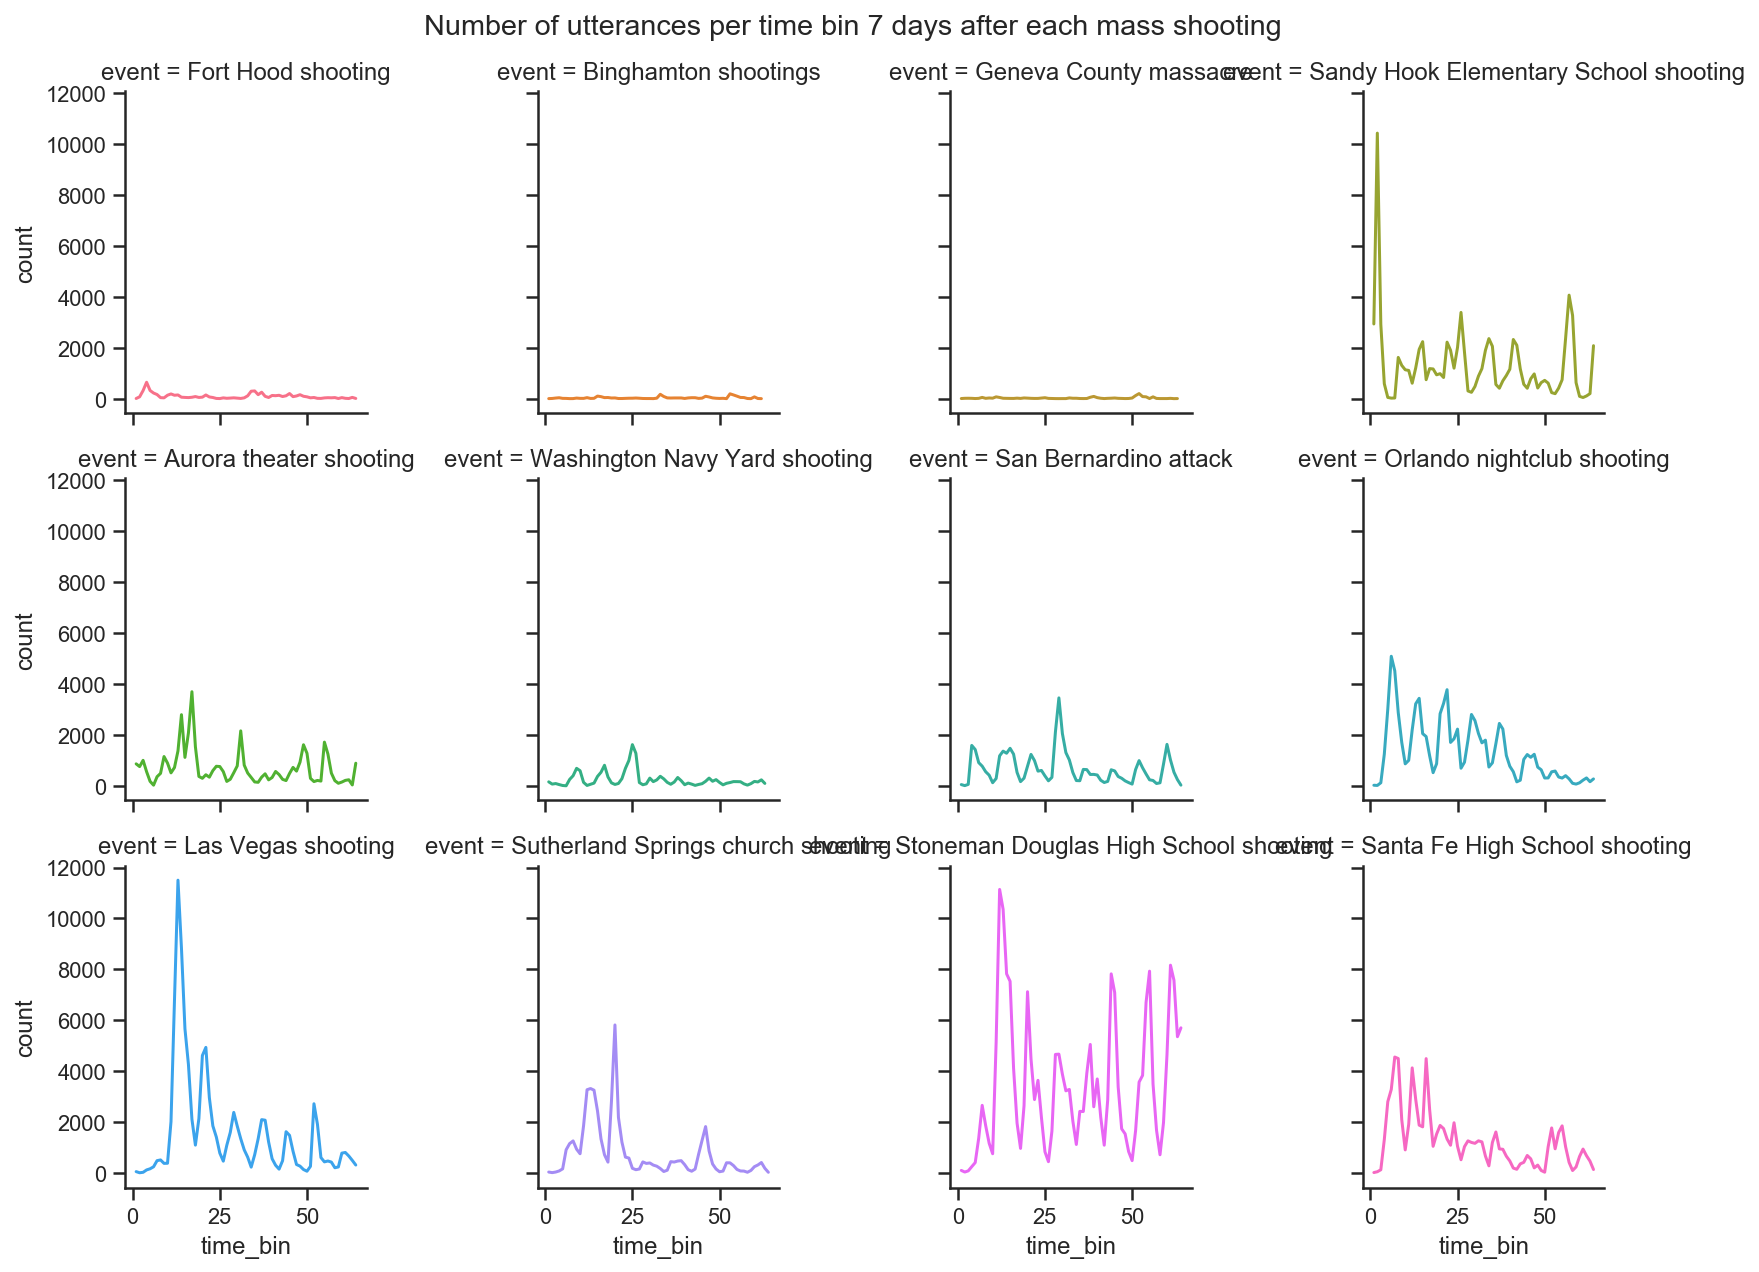

In [162]:
%matplotlib qt5
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(data=counts_df, col="event", hue='event', col_wrap=4)
g = g.map(plt.plot, "time_bin", "count")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Number of utterances per time bin 7 days after each mass shooting')
 
plt.show()

In [163]:
#scores_df.to_csv('event_poliscores_timeseries.csv')

In [213]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

events = {}
for cat in categories:
    events[cat] = scores_df[cat].event.unique()

print(events["sadness"])

['Fort Hood shooting' 'Binghamton shootings' 'Geneva County massacre'
 'Sandy Hook Elementary School shooting' 'Aurora theater shooting'
 'Washington Navy Yard shooting' 'San Bernardino attack'
 'Orlando nightclub shooting' 'Las Vegas shooting'
 'Sutherland Springs church shooting'
 'Stoneman Douglas High School shooting' 'Santa Fe High School shooting']


In [215]:
def get_result(scores_df, events, keyword):
    if keyword == "political":
        series = scores_df[(scores_df.event == events[i])]
        series2 = series['score']
        series2.index = series['time_bin']
    else:
        series = scores_df[(scores_df.event == events[i])]
        series2 = series['score']
        series2.index = series['time_bin']
    return seasonal_decompose(series2, model='additive', freq=8)

In [240]:
sadness_words = ["sadness", "pain", "love"]
anger_words = ["rage", "violence", "anger"]
pol_words = ["politics", "political"]

def get_cat_colour(cat):
    if cat in sadness_words:
        return "teal"
    elif cat in anger_words:
        return "black"
    elif cat in pol_words:
        return "grey"

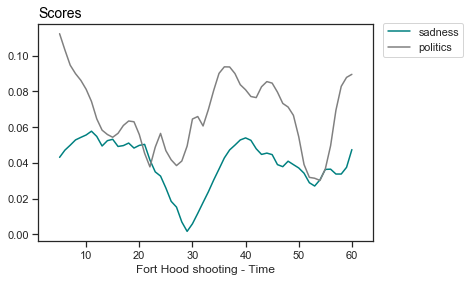

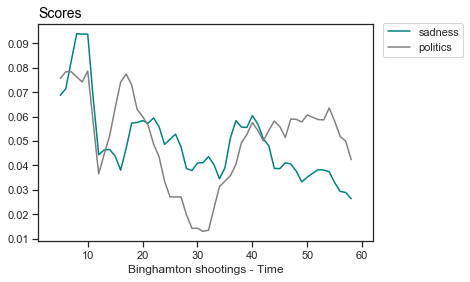

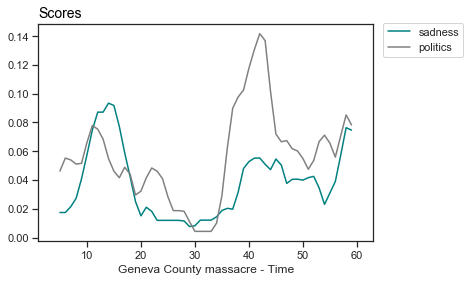

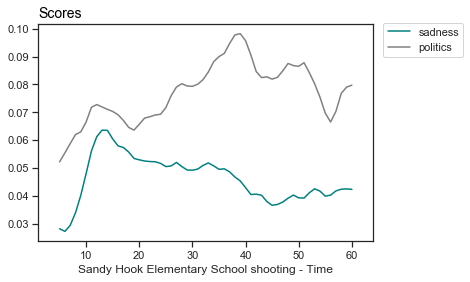

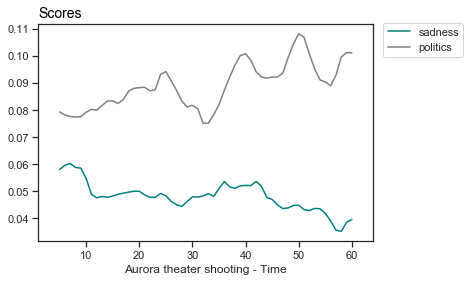

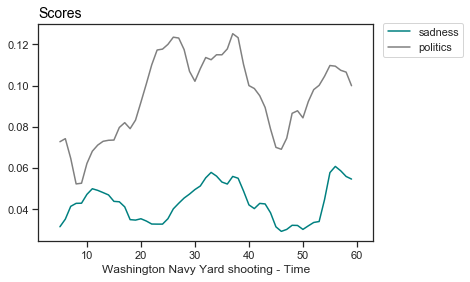

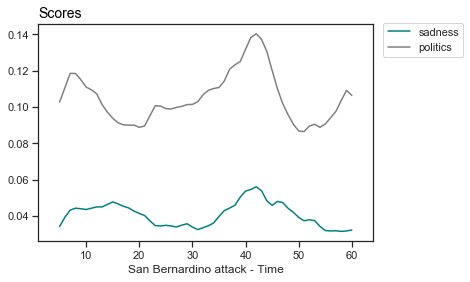

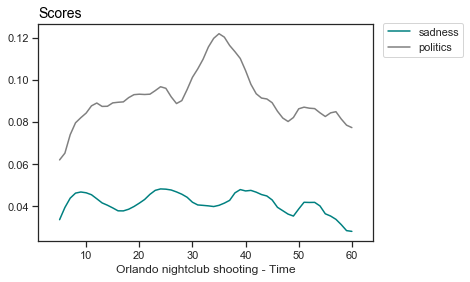

In [256]:
%matplotlib inline
for i in list(range(0, len(events))):
    for cat in categories:
        if cat == "politics" or cat == "sadness":
            results = get_result(scores_df[cat], events[cat], cat)
            results.trend.plot(label=cat, color=get_cat_colour(cat))
    plt.title("Scores", loc='left', fontsize=14, fontweight=0, color='black')
    pyplot.xlabel(events["sadness"][i] + " - Time")
    pyplot.legend(loc='upper center', bbox_to_anchor=(1.15, 1.03))
    pyplot.show()
    print(result)